Author : **Yash Trivedi**


Task   : Prediction using Unsupervised Model

# Predicting optimum number of clusters and represent them visually.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../input/iris-data/Iris.csv")


In [3]:
data.shape

(150, 6)

In [4]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
114,115,5.8,2.8,5.1,2.4,Iris-virginica
37,38,4.9,3.1,1.5,0.1,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
49,50,5.0,3.3,1.4,0.2,Iris-setosa


In [31]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [6]:
print(pd.isnull(data).sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.drop("Id",axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


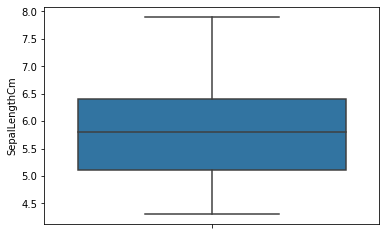

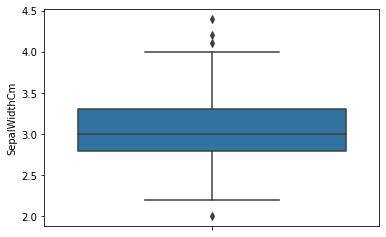

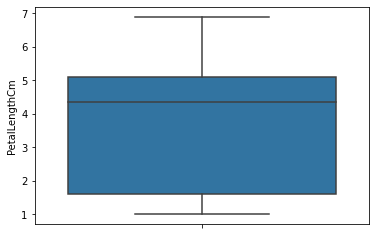

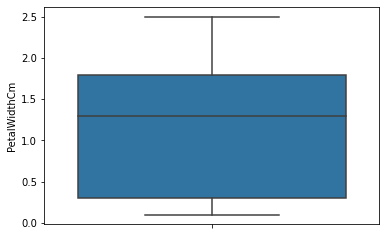

In [9]:
df=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
for i in df:
    sns.boxplot(y=df[i])
    plt.show()

# Removing outliers using ICR

In [10]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
icr = q3 - q1
LowerBound = q1 - 1.5*icr
UpperBound = q3 + 1.5*icr

data = data[(data["SepalWidthCm"]<= UpperBound) & (data["SepalWidthCm"]>= LowerBound)]
data.shape

(146, 5)

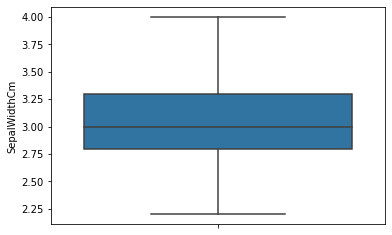

In [11]:
sns.boxplot(y = data["SepalWidthCm"])
plt.show()

# Elbow method to find optimum value of clusters

In [12]:
x = data.iloc[:,:-1].values

from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

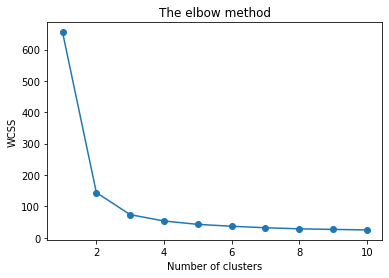

In [13]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Thus, we take number of clusters as 3.

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Clustering Petal width and Petal length

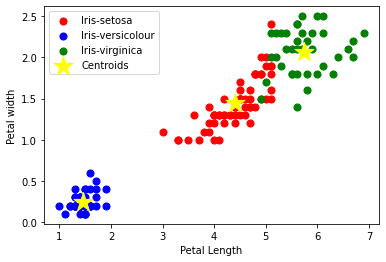

In [19]:

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 400, c = 'Yellow', label = 'Centroids',marker='*')
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

# Clustering Sepal width and Sepal length

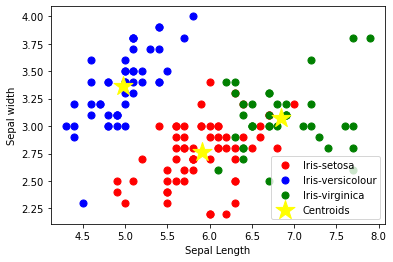

In [18]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 400, c = 'Yellow', label = 'Centroids',marker='*')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.legend()
plt.show()

# Clustering Petal width and Petal length and Sepal length

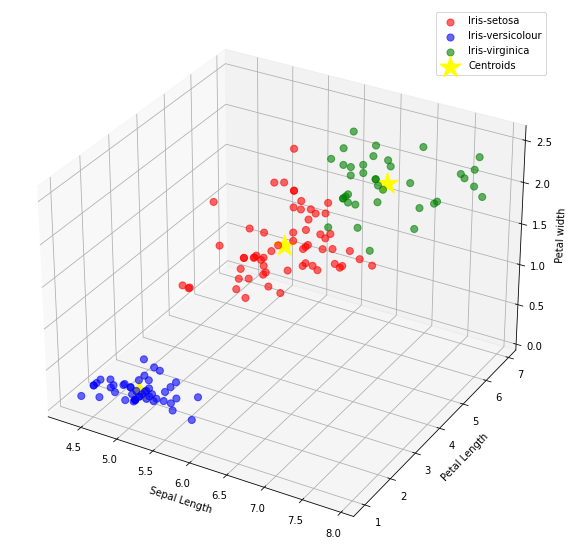

In [21]:
plt.figure(figsize = [10,10])
ax = plt.axes(projection = "3d")
ax.scatter3D(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Iris-setosa', alpha = 0.6)
ax.scatter3D(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 50, c = 'blue', label = 'Iris-versicolour',alpha = 0.6)
ax.scatter3D(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 50, c = 'green', label = 'Iris-virginica',alpha = 0.6)

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3], 
            s = 500, c = 'Yellow', label = 'Centroids',marker='*',alpha = 1)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal width")
plt.legend()
plt.show()

# Principle Component Analysis(PCA)

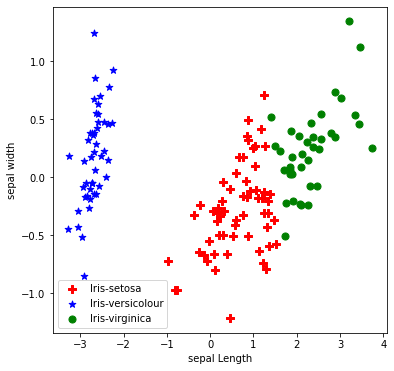

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
xp = pca.fit_transform(x)
#reorient the data from the original axes to the ones represented by the principal components

plt.figure(figsize = (6,6))
plt.scatter(xp[y_kmeans == 0, 0], xp[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa',marker = "P")
plt.scatter(xp[y_kmeans == 1, 0], xp[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour', marker = "*")
plt.scatter(xp[y_kmeans == 2, 0], xp[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica',marker = "o")

plt.xlabel("sepal Length")
plt.ylabel("sepal width")
plt.legend()
plt.show()